In [2]:

import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random
import time
from sklearn.utils import shuffle
import pandas as pd
from imblearn.over_sampling import ADASYN, SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
df = pd.read_csv("C:/Users/nazih/Downloads/THESIS CODE/data.csv")
df.shape

(58596, 57)

# This part is for binary classification(malware/benign)

In [4]:
df['Class'].replace([{"Benign":0,"Malware":1}])

0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
          ...   
58591    Malware
58592    Malware
58593    Malware
58594    Malware
58595    Malware
Name: Class, Length: 58596, dtype: object

In [5]:
df.columns


Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

In [6]:
df["Class"].unique()

array(['Benign', 'Malware'], dtype=object)

In [7]:
X = df.drop(columns=["Category","Class"])
y = df["Class"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
nb_model = GaussianNB()


nb_model.fit(X_train, y_train)

    # Predict labels on the test set
y_pred = nb_model.predict(X_test)

    # Calculate Naive Bayes classifier metrics
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred,average='weighted')
nb_recall = recall_score(y_test, y_pred,average='weighted')
nb_f1 = f1_score(y_test, y_pred,average='weighted')

    # Print the metrics
print(f"Naive Bayes Classifier Accuracy training on : {nb_accuracy:.4f}")
print(f"Naive Bayes Classifier Precision training on : {nb_precision:.4f}")
print(f"Naive Bayes Classifier Recall training on : {nb_recall:.4f}")
print(f"Naive Bayes Classifier F1-Score training on : {nb_f1:.4f}")


Naive Bayes Classifier Accuracy training on : 0.9918
Naive Bayes Classifier Precision training on : 0.9918
Naive Bayes Classifier Recall training on : 0.9918
Naive Bayes Classifier F1-Score training on : 0.9918


In [11]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(10), activation="relu", max_iter=10000)
nnc.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=10, max_iter=10000)

In [12]:
y_pred = nnc.predict(X_test)

    # Calculate Naive Bayes classifier metrics
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred,average='weighted')
nb_recall = recall_score(y_test, y_pred,average='weighted')
nb_f1 = f1_score(y_test, y_pred,average='weighted')

    # Print the metrics
print(f"Naive Bayes Classifier Accuracy training on : {nb_accuracy:.4f}")
print(f"Naive Bayes Classifier Precision training on : {nb_precision:.4f}")
print(f"Naive Bayes Classifier Recall training on : {nb_recall:.4f}")
print(f"Naive Bayes Classifier F1-Score training on : {nb_f1:.4f}")


Naive Bayes Classifier Accuracy training on : 0.9998
Naive Bayes Classifier Precision training on : 0.9998
Naive Bayes Classifier Recall training on : 0.9998
Naive Bayes Classifier F1-Score training on : 0.9998


In [13]:
df['Class'] = df['Class'].replace({'Benign': 0, 'Malware': 1})


In [14]:
clf3 = KNeighborsClassifier(n_neighbors=3)
clf3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
final_preds = clf3.predict(X_test)

# Combine predictions using majority vote
#voting_preds = np.array([random_forest_preds, xgboost_preds])
#final_preds = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=voting_preds)

# Calculate metrics
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds, average='weighted')
recall = recall_score(y_test, final_preds, average='weighted')
f1 = f1_score(y_test, final_preds, average='weighted')

print(f'rf Accuracy: {accuracy:.4f}')
print(f'rf Precision: {precision:.4f}')
print(f'rf Recall: {recall:.4f}')
print(f'rf F1 Score: {f1:.4f}')


rf Accuracy: 0.9996
rf Precision: 0.9996
rf Recall: 0.9996
rf F1 Score: 0.9996


In [16]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train individual models
random_forest_model = RandomForestClassifier(n_estimators=500, random_state=42)
#xgboost_model = XGBClassifier(n_estimators=500, random_state=42)

# Train the models
random_forest_model.fit(X_train, y_train)
#xgboost_model.fit(X_train, y_train)

# Make predictions
final_preds = random_forest_model.predict(X_test)
#final_preds = xgboost_model.predict(X_test)

# Combine predictions using majority vote
#voting_preds = np.array([random_forest_preds, xgboost_preds])
#final_preds = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=voting_preds)

# Calculate metrics
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds, average='weighted')
recall = recall_score(y_test, final_preds, average='weighted')
f1 = f1_score(y_test, final_preds, average='weighted')

print(f'rf Accuracy: {accuracy:.4f}')
print(f'rf Precision: {precision:.4f}')
print(f'rf Recall: {recall:.4f}')
print(f'rf F1 Score: {f1:.4f}')


rf Accuracy: 0.9999
rf Precision: 0.9999
rf Recall: 0.9999
rf F1 Score: 0.9999


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=['Benign', 'Malware'])


Text(0.5, 1.0, 'Confusion Matrix')

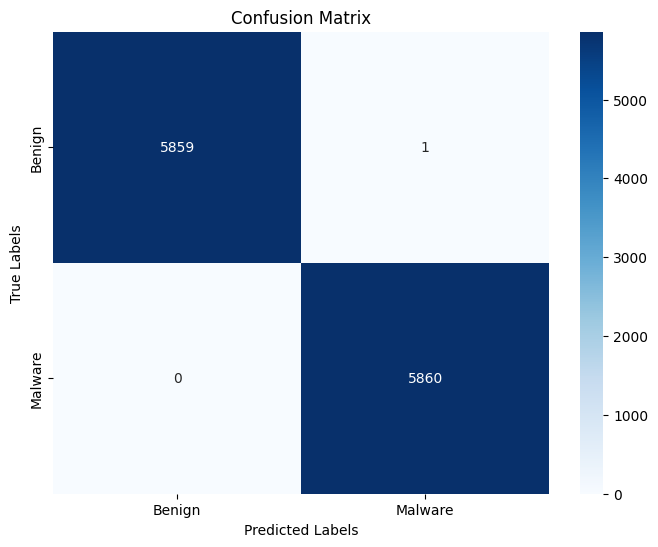

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
y_true = label_encoder.fit_transform(y_test)  # Encode test labels
y_pred = label_encoder.fit_transform(final_preds) # Your ensemble predictions

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# This part Classifies the Malware types**


In [19]:
df = pd.read_csv("C:/Users/nazih/Downloads/THESIS CODE/data.csv")
df.shape

(58596, 57)

In [20]:
# Extract the part before the underscore symbol
df['Category'] = [label.split('-')[0] for label in df['Category']]

df["Category"].unique()

array(['Benign', 'Ransomware', 'Spyware', 'Trojan'], dtype=object)

In [21]:
df["Class"].unique()

array(['Benign', 'Malware'], dtype=object)

In [22]:
for i in (df["Category"].unique()):
    print(((df["Category"]== i).sum()))

29298
9791
10020
9487


In [23]:
df = df.drop(columns=["Class"])

In [24]:
X = df.drop(columns=['Category'])  # Features
y = df['Category']  # Target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train.shape

(46876, 55)

In [35]:
clf1 = RandomForestClassifier(n_estimators=700, random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=3)
clf4 = XGBClassifier(n_estimators=500, random_state=42)

In [29]:
#clf2 = MLPClassifier(hidden_layer_sizes=(11), activation="relu", max_iter=1000000)


In [ ]:
#clf2.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=11, max_iter=1000000)

In [36]:
clf1.fit(X_train, y_train)
clf3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
df['Category'] = df['Category'].replace({'Benign': 0, 'Ransomware': 1,'Spyware':2,'Trojan':3})
X = df.drop(columns=['Category'])  # Features
y = df['Category']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

In [38]:
clf4.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [34]:
final_preds = clf1.predict(X_test)
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds, average='weighted')
recall = recall_score(y_test, final_preds, average='weighted')
f1 = f1_score(y_test, final_preds, average='weighted')

print(f'rf Accuracy: {accuracy:.4f}')
print(f'rf Precision: {precision:.4f}')
print(f'rf Recall: {recall:.4f}')
print(f'rf F1 Score: {f1:.4f}')


c:\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: Mix of label input types (string and number)

In [39]:
final_preds = clf2.predict(X_test)
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds, average='weighted')
recall = recall_score(y_test, final_preds, average='weighted')
f1 = f1_score(y_test, final_preds, average='weighted')

print(f'rf Accuracy: {accuracy:.4f}')
print(f'rf Precision: {precision:.4f}')
print(f'rf Recall: {recall:.4f}')
print(f'rf F1 Score: {f1:.4f}')


c:\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


ValueError: Mix of label input types (string and number)

In [ ]:
final_preds = clf3.predict(X_test)
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds, average='weighted')
recall = recall_score(y_test, final_preds, average='weighted')
f1 = f1_score(y_test, final_preds, average='weighted')

print(f'rf Accuracy: {accuracy:.4f}')
print(f'rf Precision: {precision:.4f}')
print(f'rf Recall: {recall:.4f}')
print(f'rf F1 Score: {f1:.4f}')


In [ ]:
final_preds = clf4.predict(X_test)
accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds, average='weighted')
recall = recall_score(y_test, final_preds, average='weighted')
f1 = f1_score(y_test, final_preds, average='weighted')

print(f'rf Accuracy: {accuracy:.4f}')
print(f'rf Precision: {precision:.4f}')
print(f'rf Recall: {recall:.4f}')
print(f'rf F1 Score: {f1:.4f}')


# undersampling majority class

In [40]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_train, y_train)
#print(sorted(Counter(y_resampled).items()))

In [41]:
X_resampled.shape

(36157, 55)

In [42]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled_nm1 = nm1.fit_resample(X_train, y_train)

In [43]:
X_resampled_nm1.shape

(30356, 55)

In [44]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_rand_resampled, y_rand_resampled = rus.fit_resample(X_train, y_train)


In [45]:
X_rand_resampled.shape

(30356, 55)

In [46]:
from imblearn.under_sampling import AllKNN
allknn = AllKNN()
X_knn_resampled, y_knn_resampled = allknn.fit_resample(X_train, y_train)
X_knn_resampled.shape

(41158, 55)

In [47]:
X = [X_knn_resampled,X_rand_resampled,X_resampled_nm1,X_resampled]
y = [y_knn_resampled,y_rand_resampled,y_resampled_nm1,y_resampled]

In [48]:
# Create a RandomForestClassifier instance
rf_model = RandomForestClassifier(random_state=42)


rfModel = RandomForestClassifier(n_estimators=700, random_state=42)
for i in range(4):
    rfModel.fit(X[i], y[i])

    # Predict labels on the test set
    y_pred = rfModel.predict(X_test)

    # Calculate Random Forest classifier metrics
    rf_accuracy = accuracy_score(y_test, y_pred)
    rf_precision = precision_score(y_test, y_pred,average='weighted')
    rf_recall = recall_score(y_test, y_pred,average='weighted')
    rf_f1 = f1_score(y_test, y_pred,average='weighted')

    # Print the metrics
    print(f"Random Forest Classifier Accuracy training on {i}: {rf_accuracy:.4f}")
    print(f"Random Forest Classifier Precision training on {i}: {rf_precision:.4f}")
    print(f"Random Forest Classifier Recall training on {i}: {rf_recall:.4f}")
    print(f"Random Forest Classifier F1-Score training on {i}: {rf_f1:.4f}")
    print("\n")

Random Forest Classifier Accuracy training on 0: 0.8512
Random Forest Classifier Precision training on 0: 0.8640
Random Forest Classifier Recall training on 0: 0.8512
Random Forest Classifier F1-Score training on 0: 0.8508


Random Forest Classifier Accuracy training on 1: 0.8716
Random Forest Classifier Precision training on 1: 0.8717
Random Forest Classifier Recall training on 1: 0.8716
Random Forest Classifier F1-Score training on 1: 0.8716


Random Forest Classifier Accuracy training on 2: 0.8681
Random Forest Classifier Precision training on 2: 0.8684
Random Forest Classifier Recall training on 2: 0.8681
Random Forest Classifier F1-Score training on 2: 0.8682


Random Forest Classifier Accuracy training on 3: 0.7986
Random Forest Classifier Precision training on 3: 0.8588
Random Forest Classifier Recall training on 3: 0.7986
Random Forest Classifier F1-Score training on 3: 0.7907




In [ ]:
clf2 = MLPClassifier(hidden_layer_sizes=(10), activation="relu", max_iter=1000000)
for i in range(4):
    clf2.fit(X[i], y[i])

    # Predict labels on the test set
    y_pred = clf2.predict(X_test)

    # Calculate Random Forest classifier metrics
    rf_accuracy = accuracy_score(y_test, y_pred)
    rf_precision = precision_score(y_test, y_pred,average='weighted')
    rf_recall = recall_score(y_test, y_pred,average='weighted')
    rf_f1 = f1_score(y_test, y_pred,average='weighted')

    # Print the metrics
    print(f"mlp Accuracy training on {i}: {rf_accuracy:.4f}")
    print(f"mlp Precision training on {i}: {rf_precision:.4f}")
    print(f"mlp training on {i}: {rf_recall:.4f}")
    print(f"mlp F1-Score training on {i}: {rf_f1:.4f}")
    print("\n")

In [49]:
clf3 = KNeighborsClassifier(n_neighbors=3)
for i in range(4):
    clf3.fit(X[i], y[i])

    # Predict labels on the test set
    y_pred = clf3.predict(X_test)

    # Calculate Random Forest classifier metrics
    rf_accuracy = accuracy_score(y_test, y_pred)
    rf_precision = precision_score(y_test, y_pred,average='weighted')
    rf_recall = recall_score(y_test, y_pred,average='weighted')
    rf_f1 = f1_score(y_test, y_pred,average='weighted')

    # Print the metrics
    print(f"knn Accuracy training on {i}: {rf_accuracy:.4f}")
    print(f"knn Precision training on {i}: {rf_precision:.4f}")
    print(f"knn Recall training on {i}: {rf_recall:.4f}")
    print(f"knn F1-Score training on {i}: {rf_f1:.4f}")
    print("\n")

knn Accuracy training on 0: 0.8072
knn Precision training on 0: 0.8112
knn Recall training on 0: 0.8072
knn F1-Score training on 0: 0.8065


knn Accuracy training on 1: 0.8142
knn Precision training on 1: 0.8172
knn Recall training on 1: 0.8142
knn F1-Score training on 1: 0.8149


knn Accuracy training on 2: 0.8041
knn Precision training on 2: 0.8086
knn Recall training on 2: 0.8041
knn F1-Score training on 2: 0.8054


knn Accuracy training on 3: 0.7804
knn Precision training on 3: 0.8203
knn Recall training on 3: 0.7804
knn F1-Score training on 3: 0.7718




In [50]:
clf4 = XGBClassifier(n_estimators=700, random_state=42)
for i in range(4):
    clf4.fit(X[i], y[i])

    # Predict labels on the test set
    y_pred = clf4.predict(X_test)

    # Calculate Random Forest classifier metrics
    rf_accuracy = accuracy_score(y_test, y_pred)
    rf_precision = precision_score(y_test, y_pred,average='weighted')
    rf_recall = recall_score(y_test, y_pred,average='weighted')
    rf_f1 = f1_score(y_test, y_pred,average='weighted')

    # Print the metrics
    print(f"xgb Accuracy training on {i}: {rf_accuracy:.4f}")
    print(f"xgb Precision training on {i}: {rf_precision:.4f}")
    print(f"xgb Recall training on {i}: {rf_recall:.4f}")
    print(f"xgb F1-Score training on {i}: {rf_f1:.4f}")
    print("\n")

xgb Accuracy training on 0: 0.8598
xgb Precision training on 0: 0.8698
xgb Recall training on 0: 0.8598
xgb F1-Score training on 0: 0.8595


xgb Accuracy training on 1: 0.8813
xgb Precision training on 1: 0.8812
xgb Recall training on 1: 0.8813
xgb F1-Score training on 1: 0.8812


xgb Accuracy training on 2: 0.8785
xgb Precision training on 2: 0.8785
xgb Recall training on 2: 0.8785
xgb F1-Score training on 2: 0.8785


xgb Accuracy training on 3: 0.8071
xgb Precision training on 3: 0.8618
xgb Recall training on 3: 0.8071
xgb F1-Score training on 3: 0.8002




In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=['Benign', 'Ransomware', 'Spyware', 'Trojan'])

In [ ]:
nb_model2 = GaussianNB()
nb_model2.fit(X_train,y_train)

In [ ]:
y_pred = nb_model2.predict(X_test)


In [ ]:
confusion_matrix(y_test, y_pred, labels=['Benign', 'Ransomware', 'Spyware', 'Trojan'])


In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred,average='weighted')
rf_recall = recall_score(y_test, y_pred,average='weighted')
rf_f1 = f1_score(y_test, y_pred,average='weighted')


print(f"Random Forest Classifier Accuracy training on : {rf_accuracy:.4f}")
print(f"Random Forest Classifier Precision training on : {rf_precision:.4f}")
print(f"Random Forest Classifier Recall training on : {rf_recall:.4f}")
print(f"Random Forest Classifier F1-Score training on : {rf_f1:.4f}")

In [ ]:
df = pd.read_csv("/kaggle/input/cic-malmem-2022/Obfuscated-MalMem2022.csv")

In [ ]:
df = df[df['Class'] != 'Benign']

In [ ]:
df.shape

In [ ]:
df.Category.unique()

In [ ]:
df['Category'] = [label.split('-')[0] for label in df['Category']]

df["Category"].unique()

In [ ]:
X = df.drop(columns=["Category","Class"])
y = df["Category"]

In [ ]:
y

In [ ]:
clf1 = RandomForestClassifier(n_estimators=700, random_state=42)
clf2 = MLPClassifier(hidden_layer_sizes=(9), activation="relu", max_iter=10000)
clf3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)

In [ ]:
X_test.shape

In [ ]:
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred)


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test,y_pred)


In [ ]:
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
accuracy_score(y_test,y_pred)


# ADASYN to oversample each minority class separately

In [3]:
df = pd.read_csv("C:/Users/nazih/Downloads/THESIS CODE/data.csv")

df['Category'] = [label.split('-')[0] for label in df['Category']]
df = df[df['Category'] != 'Ransomware']
df = df[df['Category'] != 'Spyware']
df["Category"].unique()


array(['Benign', 'Trojan'], dtype=object)

In [4]:
df['Category'] = df['Category'].replace({'Benign': 0, 'Trojan': 1})
df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,0,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,0,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,0,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,0,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [5]:
category_counts = df['Category'].value_counts()

print(category_counts)

Category
0    29298
1     9487
Name: count, dtype: int64


In [6]:

# Assuming your DataFrame is named df
X = df.drop(columns=['Class','Category'])  # Features
y = df['Category']  # Target

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Print the new class distribution after oversampling
print("ADASYN:")
print(pd.Series(y_adasyn).value_counts())



adasyn_df_trojan = pd.DataFrame(X_adasyn, columns=X.columns)
adasyn_df_trojan['Category'] = y_adasyn
adasyn_df_trojan.head()

ADASYN:
Category
0    29298
1    29291
Name: count, dtype: int64


,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Category
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,0


In [8]:
df = pd.read_csv("C:/Users/nazih/Downloads/THESIS CODE/data.csv")

df['Category'] = [label.split('-')[0] for label in df['Category']]
df = df[df['Category'] != 'Trojan']
df = df[df['Category'] != 'Spyware']
df["Category"].unique()


array(['Benign', 'Ransomware'], dtype=object)

In [9]:
df['Category'] = df['Category'].replace({'Benign': 0, 'Ransomware': 1})
df.head()

X = df.drop(columns=['Class','Category'])  # Features
y = df['Category']  # Target

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Print the new class distribution after oversampling
print("ADASYN:")
print(pd.Series(y_adasyn).value_counts())



adasyn_df_ransom = pd.DataFrame(X_adasyn, columns=X.columns)
adasyn_df_ransom['Category'] = y_adasyn
adasyn_df_ransom.head()

ADASYN:
Category
0    29298
1    29291
Name: count, dtype: int64


,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Category
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,0


In [10]:
df = pd.read_csv("C:/Users/nazih/Downloads/THESIS CODE/data.csv")

df['Category'] = [label.split('-')[0] for label in df['Category']]
df = df[df['Category'] != 'Trojan']
df = df[df['Category'] != 'Ransomware']
df["Category"].unique()


array(['Benign', 'Spyware'], dtype=object)

In [11]:
df['Category'] = df['Category'].replace({'Benign': 0, 'Spyware': 1})
df.head()

X = df.drop(columns=['Class','Category'])  # Features
y = df['Category']  # Target

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Print the new class distribution after oversampling
print("ADASYN:")
print(pd.Series(y_adasyn).value_counts())



adasyn_df_spy = pd.DataFrame(X_adasyn, columns=X.columns)
adasyn_df_spy['Category'] = y_adasyn
adasyn_df_spy.head()

ADASYN:
Category
1    29313
0    29298
Name: count, dtype: int64


,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Category
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,0


In [12]:
adasyn_df_spy = adasyn_df_spy[adasyn_df_spy['Category'] == 1]
adasyn_df_ransom = adasyn_df_ransom[adasyn_df_ransom['Category'] == 1]
adasyn_df_trojan = adasyn_df_trojan[adasyn_df_trojan['Category'] == 1]
adasyn_df_spy['Category'] = adasyn_df_spy['Category'].replace({1:"Spyware"})


In [13]:
adasyn_df_spy['Category'] = adasyn_df_spy['Category'].replace({1:"Spyware"})
adasyn_df_trojan['Category'] = adasyn_df_trojan['Category'].replace({1:"Trojan"})
adasyn_df_ransom['Category'] = adasyn_df_ransom['Category'].replace({1:"Ransomware"})



In [14]:
combined_df = pd.concat([adasyn_df_spy, adasyn_df_trojan, adasyn_df_ransom], ignore_index=True)

In [15]:
combined_df.shape

(87895, 56)

# only malwares

In [16]:
X = combined_df.drop(columns=['Category'])  # Features
y = combined_df['Category']  # Target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.1, random_state=42)

In [18]:
clf1 = RandomForestClassifier(n_estimators=700, random_state=42)
#clf2 = MLPClassifier(hidden_layer_sizes=(11), activation="relu", max_iter=100000)
clf3 = KNeighborsClassifier(n_neighbors=3)

In [19]:
#Standardize Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
clf1.fit(X_train, y_train)
#clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Random Forest Classifier Accuracy: 0.9241
Random Forest Classifier Precision: 0.9241
Random Forest Classifier Recall: 0.9241
Random Forest Classifier F1-Score: 0.9241


<Axes: >

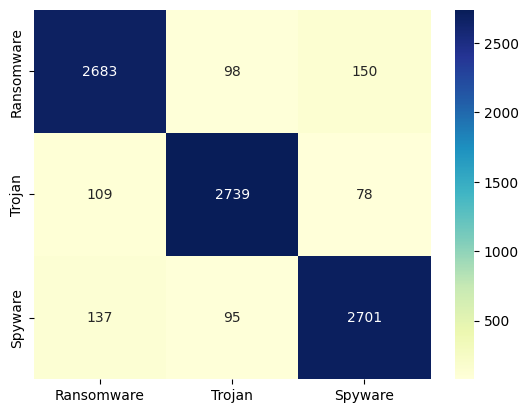

In [21]:
y_pred = clf1.predict(X_test)
# Calculate Random Forest classifier metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred,average='weighted')
rf_recall = recall_score(y_test, y_pred,average='weighted')
rf_f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Classifier Precision: {rf_precision:.4f}")
print(f"Random Forest Classifier Recall: {rf_recall:.4f}")
print(f"Random Forest Classifier F1-Score: {rf_f1:.4f}")
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Ransomware' ,'Trojan' ,'Spyware'], yticklabels=['Ransomware' ,'Trojan' ,'Spyware'], annot=True)

K-Nearest Neighbors Classifier Accuracy: 0.8810
K-Nearest Neighbors Classifier Precision: 0.8818
K-Nearest Neighbors Classifier Recall: 0.8810
K-Nearest Neighbors Classifier F1-Score: 0.8812


<Axes: >

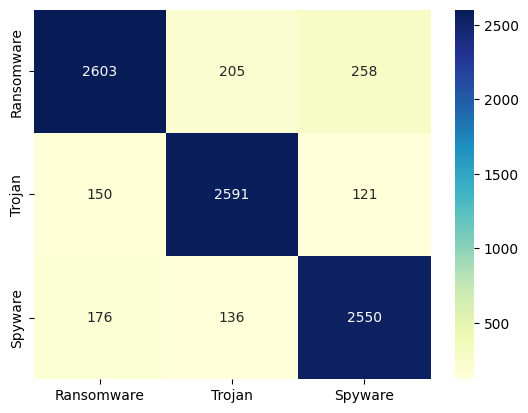

In [22]:
y_pred = clf3.predict(X_test)
# Calculate KNN classifier metrics
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"K-Nearest Neighbors Classifier Accuracy: {knn_accuracy:.4f}")
print(f"K-Nearest Neighbors Classifier Precision: {knn_precision:.4f}")
print(f"K-Nearest Neighbors Classifier Recall: {knn_recall:.4f}")
print(f"K-Nearest Neighbors Classifier F1-Score: {knn_f1:.4f}")
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Ransomware' ,'Trojan' ,'Spyware'], yticklabels=['Ransomware' ,'Trojan' ,'Spyware'], annot=True)

In [ ]:
y_pred = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"MLP acc: {knn_accuracy:.4f}")
print(f"MLP Precision: {knn_precision:.4f}")
print(f"MLP Recall: {knn_recall:.4f}")
print(f"MLP F1-Score: {knn_f1:.4f}")
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Ransomware' ,'Trojan' ,'Spyware'], yticklabels=['Ransomware' ,'Trojan' ,'Spyware'], annot=True)

# with benign

In [23]:
df = pd.read_csv("C:/Users/nazih/Downloads/THESIS CODE/data.csv")

df['Category'] = [label.split('-')[0] for label in df['Category']]
df = df[df["Class"] == "Benign"]
df = df.drop(["Class"],axis=1)

In [24]:
all_concat_df = pd.concat([combined_df,df],ignore_index=True)
all_concat_df.Category.unique()

array(['Spyware', 'Trojan', 'Ransomware', 'Benign'], dtype=object)

In [25]:

X = all_concat_df.drop(columns=["Category"])
y = all_concat_df["Category"]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.1, random_state=42)
#Standardize Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf1 = RandomForestClassifier(n_estimators=700, random_state=42)
clf2 = MLPClassifier(hidden_layer_sizes=(9), activation="relu", max_iter=10000)
clf3 = KNeighborsClassifier(n_neighbors=3)

In [27]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"MLP acc: {accuracy:.4f}")
print(f"MLP Precision: {accuracy:.4f}")
print(f"MLP Recall: {accuracy:.4f}")
print(f"MLP F1-Score: {accuracy:.4f}")
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], yticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], annot=True)

K-Nearest Neighbors Classifier Accuracy: 0.9121
K-Nearest Neighbors Classifier Precision: 0.9129
K-Nearest Neighbors Classifier Recall: 0.9121
K-Nearest Neighbors Classifier F1-Score: 0.9122


<Axes: >

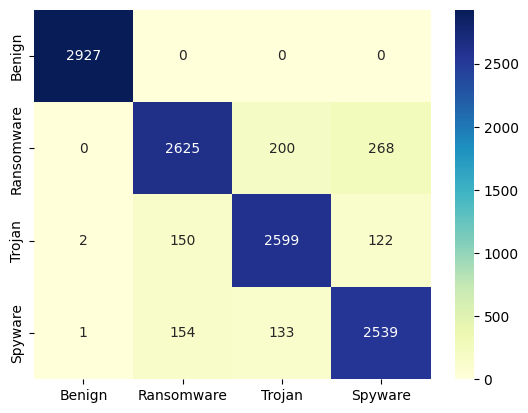

In [28]:
y_pred = clf3.predict(X_test)
# Calculate KNN classifier metrics
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"K-Nearest Neighbors Classifier Accuracy: {knn_accuracy:.4f}")
print(f"K-Nearest Neighbors Classifier Precision: {knn_precision:.4f}")
print(f"K-Nearest Neighbors Classifier Recall: {knn_recall:.4f}")
print(f"K-Nearest Neighbors Classifier F1-Score: {knn_f1:.4f}")
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], yticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], annot=True)

In [ ]:
y_pred = clf1.predict(X_test)
# Calculate Random Forest classifier metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred,average='weighted')
rf_recall = recall_score(y_test, y_pred,average='weighted')
rf_f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Classifier Precision: {rf_precision:.4f}")
print(f"Random Forest Classifier Recall: {rf_recall:.4f}")
print(f"Random Forest Classifier F1-Score: {rf_f1:.4f}")
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], yticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], annot=True)

In [ ]:


clf4 = XGBClassifier(n_estimators=700, random_state=42)

all_concat_df["Category"].unique()
all_concat_df['Category'] = all_concat_df['Category'].replace({'Benign': 0, 'Ransomware': 1,'Spyware':2,'Trojan':3})
X = all_concat_df.drop(columns=['Category'])  # Features
y = all_concat_df['Category']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.1, random_state=42)

In [ ]:
clf4.fit(X_train, y_train)

In [ ]:
y_test

In [ ]:
y_test = y_test.replace({'Benign': 0, 'Ransomware': 1,'Spyware':2,'Trojan':3})


In [ ]:
y_pred = clf4.predict(X_test)
# Calculate Random Forest classifier metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred,average='weighted')
rf_recall = recall_score(y_test, y_pred,average='weighted')
rf_f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Classifier Precision: {rf_precision:.4f}")
print(f"Random Forest Classifier Recall: {rf_recall:.4f}")
print(f"Random Forest Classifier F1-Score: {rf_f1:.4f}")
conf = confusion_matrix(y_pred, y_test)

sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], yticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], annot=True)
output_path = 'E:\MalMem Paper\binconfmat.png'  # Change this to your desired directory and filename
print("Output path:", output_path)
plt.savefig(output_path, dpi=300, bbox_inches='tight')  #plt.show()
print("Output path:", output_path)